### <span  style = 'color: yellow'> **Simple Linear Regression** </span>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


1. read the dataset
2. EDA,  FE
3. Divide our dataset into independent and dependent features
4. further dicide the dataset into train and test
5. standard scaling on train and test data
6. Model training

In [2]:
df = pd.read_csv('height-weight.csv')
df.head()


,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


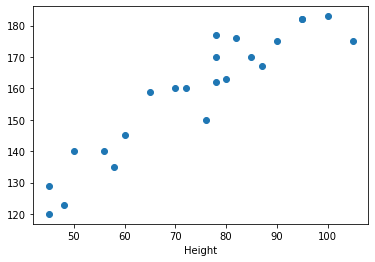

In [3]:
plt.scatter(df['Weight'], df['Height'])
plt.xlabel('Weight')
plt.xlabel('Height')
plt.show()


In [4]:
# divide our dataset into independent and dependent features
#  x or independent feature always in double bracket [[]]
x = df[['Weight']]  # independent feature
y = df['Height']  # dependent features


In [5]:
x.head()


,Weight
0,45
1,58
2,48
3,60
4,70


In [6]:
y.head()


0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [7]:
x.shape, y.shape


((23, 1), (23,))

sklearn model selection : https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [8]:
from sklearn.model_selection import train_test_split


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=42)


In [10]:
X_train.shape, X_test.shape


((18, 1), (5, 1))

In [11]:
y_train.shape, y_test.shape


((18,), (5,))

In [12]:
from sklearn.preprocessing import StandardScaler


In [13]:
scaler = StandardScaler()


In [14]:
# train always apply only fit_transform not only transform
x_train = scaler.fit_transform(X_train)
x_train.shape


(18, 1)

In [15]:
# test always perform only transform not fit_transform
x_test = scaler.transform(X_test)


In [34]:
x_test


array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

dont apply standardscaler on y test and train because y is output

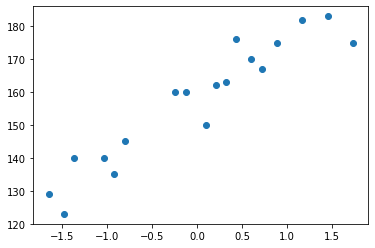

In [16]:
plt.scatter(x_train, y_train)
plt.show()


model training : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [17]:
#  model training

from sklearn.linear_model import LinearRegression


In [18]:
regression = LinearRegression()


In [19]:
# training the train data
regression.fit(x_train, y_train)


LinearRegression()

In [20]:
regression.intercept_
# this is thita 0


157.5

In [21]:
regression.coef_
# only 1 coef because we have only 1 feature
# this is thita 1


array([17.03440872])

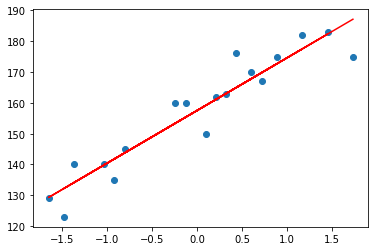

In [22]:
plt.scatter(x_train, y_train)
plt.plot(x_train, regression.predict(x_train), 'r')
plt.show()


### prediction of train data
1. predicted height output = intercept + coef_ * (Weights)
2. y_pred_train = 157.5 + 17.03 *(x_train)

### prediction of test data
1. predicted height output =   intercept + coef_ * (Weights)
2. y_pred_test = 15.75 + 17.03 *(x_test)

In [23]:
# prediction for the test data
y_pred_test = regression.predict(x_test)


In [24]:
y_pred_test


array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [25]:
y_test


15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

some difference in y_test_predict value and y_test value

### performance metrices MAE, MSE, RMSE

mean squared error: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [27]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)


109.77592599051664
9.822657814519232
10.477400726827081


### Accuracy of the model R squared and adjusted r squared

### **R square**
formula : 
R^2 = 1 - SSR/SST
- R^2 = Accuracy of the model
- SSR = sum of squares pf residuals
- SST = total sum of squares
- sklearn : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [28]:
from sklearn.metrics import r2_score


In [29]:
score = r2_score(y_test, y_pred_test)
score


0.776986986042344

### Adjusted r square

Adjusted R2 =  1 - [(1-R2)* (n-1)/ (n-k-1)]

where:

- R2 : The R2 of the model
- n : The number of observations
- K : The number of predictor variables

In [30]:
# adjusted r- squared
1 - (1-score) * (len(y_test)-1) / (len(y_test) - x_test.shape[1]-1)


0.7026493147231252